In [223]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
import ast
from scipy.spatial.distance import pdist
import cv2

In [3]:
def make_connections(image, euclidean):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image_with_boxes = image_rgb.copy()

  for index, row in euclidean.iterrows():
      left = int(row['Left'][0])
      right = int(row['Right'][0])
      top = int(row['Top'][1])
      bottom = int(row['Bottom'][1])
      box_id = int(row['Id'])

      width = right - left
      height = bottom - top

      top_left = (left, top)
      bottom_right = (right, bottom)

      cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

      label_position = (left, top - 10)
      cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

      top_adjacent_id = int(row['Top_Box'][1])
      bottom_adjacent_id = int(row['Bottom_Box'][1])
      left_adjacent_id = int(row['Left_Box'][1])
      right_adjacent_id = int(row['Right_Box'][1])

      if top_adjacent_id != 0:
          top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
          top_adjacent_center = int(top_adjacent_row['Bottom'][0]) , int(top_adjacent_row['Bottom'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

      if bottom_adjacent_id != 0:
          bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
          bottom_adjacent_center = int(bottom_adjacent_row['Top'][0]) , int(bottom_adjacent_row['Top'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

      if left_adjacent_id != 0:
          left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
          left_adjacent_center = int(left_adjacent_row['Right'][0]) , int(left_adjacent_row['Right'][1])
          cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

      if right_adjacent_id != 0:
          right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
          right_adjacent_center = int(right_adjacent_row['Left'][0]) , int(right_adjacent_row['Left'][1])
          cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

  return image_with_boxes

In [397]:
df1 = pd.read_csv("./SMAI - AQ2/CSV/TLBR_145.csv")
df1['Top-Left'] = df1['Top-Left'].apply(ast.literal_eval)
df1['Bottom-Right'] = df1['Bottom-Right'].apply(ast.literal_eval)
data1 = np.array(df1)

print(data1.shape)

(258, 4)


In [398]:
def custom_distance(x, y):
    coord1_top = x[1][0]
    coord1_left = x[1][1]
    coord1_bottom = x[2][0]
    coord1_right = x[2][1]
    
    coord2_top = y[1][0]
    coord2_left = y[1][1]
    coord2_bottom = y[2][0]
    coord2_right = y[2][1]
    
    coord1_leftcenter = [coord1_top, (coord1_left + coord1_right)/2]
    coord1_rightcenter = [coord1_bottom, (coord1_left + coord1_right)/2]
    coord1_topcenter = [(coord1_top+coord1_bottom)/2, coord1_left]
    coord1_bottomcenter = [(coord1_top+coord1_bottom)/2, coord1_right]
    
    coord1 = np.array([coord1_leftcenter,coord1_rightcenter,coord1_topcenter,coord1_bottomcenter])
    
    coord2_leftcenter = [coord2_top, (coord2_left + coord2_right)/2]
    coord2_rightcenter = [coord2_bottom, (coord2_left + coord2_right)/2]
    coord2_topcenter = [(coord2_top+coord2_bottom)/2, coord2_left]
    coord2_bottomcenter = [(coord2_top+coord2_bottom)/2, coord2_right]
    
    coord2 = np.array([coord2_leftcenter,coord2_rightcenter,coord2_topcenter,coord2_bottomcenter])
    
    min_v = None
    
    for i in range(len(coord1)):
        for j in range(len(coord2)):
            if(min_v == None):
                min_v = np.linalg.norm(coord1[i]-coord2[j])
            else:
                min_v = min(min_v,np.linalg.norm(coord1[i]-coord2[j]))
    
    return min_v

In [399]:
def custom_distance_dir(x, y):
    coord1_top = x[1][0]
    coord1_left = x[1][1]
    coord1_bottom = x[2][0]
    coord1_right = x[2][1]
    
    coord2_top = y[1][0]
    coord2_left = y[1][1]
    coord2_bottom = y[2][0]
    coord2_right = y[2][1]
    
    coord1_leftcenter = [coord1_top, (coord1_left + coord1_right)/2]
    coord1_rightcenter = [coord1_bottom, (coord1_left + coord1_right)/2]
    coord1_topcenter = [(coord1_top+coord1_bottom)/2, coord1_left]
    coord1_bottomcenter = [(coord1_top+coord1_bottom)/2, coord1_right]
    
    coord1 = np.array([coord1_leftcenter,coord1_rightcenter,coord1_topcenter,coord1_bottomcenter])
    
    coord2_leftcenter = [coord2_top, (coord2_left + coord2_right)/2]
    coord2_rightcenter = [coord2_bottom, (coord2_left + coord2_right)/2]
    coord2_topcenter = [(coord2_top+coord2_bottom)/2, coord2_left]
    coord2_bottomcenter = [(coord2_top+coord2_bottom)/2, coord2_right]
    
    coord2 = np.array([coord2_leftcenter,coord2_rightcenter,coord2_topcenter,coord2_bottomcenter])
    
    min_v = None
    dir1 = 'L'
    dir2 = 'L'
    
    directions = ['L','R','U','D']
    for i in range(len(coord1)):
        for j in range(len(coord2)):
            if(min_v == None):
                min_v = np.linalg.norm(coord1[i]-coord2[j])
            else:
                min_v = min(min_v,np.linalg.norm(coord1[i]-coord2[j]))
                if(min_v == np.linalg.norm(coord1[i]-coord2[j])):
                    dir1 = directions[i]
                    dir2 = directions[j]
                
    return np.array([float(min_v), dir1, dir2])

In [400]:
pairwise_distances = pdist(data1, metric=custom_distance)

linkage_matrix = linkage(pairwise_distances, method='ward')

In [401]:
print(linkage_matrix.shape)

(257, 4)


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [120.0, 120.0, 160.0, 160.0],
  [80.0, 80.0, 140.0, 140.0],
  [27.5, 27.5, 110.0, 110.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [200.0, 200.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [290.0, 290.0, 320.0, 320.0],
  [270.0, 270.0, 305.0, 305.0],
  [345.0, 345.0, 355.0, 355.0],
  [3

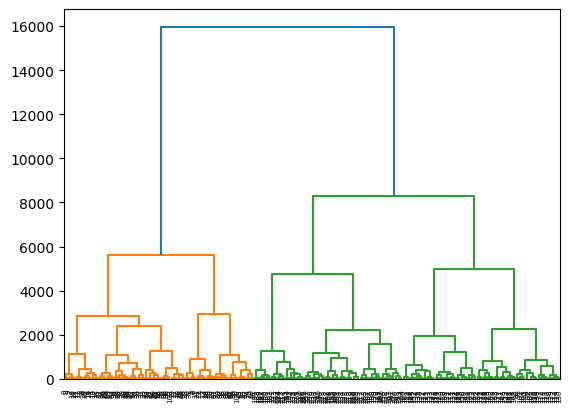

In [428]:
dendrogram(linkage_matrix)

In [429]:
# ChatGPT Code: Write code to extract level-wise clusters.

def get_levelwise_clusters(linkage_matrix):
    n = len(linkage_matrix)+1

    clusters = {i: [i] for i in range(n)}

    all_clusters = []

    for i in range(n):
        all_clusters.append([i])

    for i in range(n - 1):
        a, b = linkage_matrix[i, :2].astype(int)
        merged = clusters[a] + clusters[b]
        clusters[n + i] = merged

        del clusters[a]
        del clusters[b]

        all_clusters.append(merged)

    return all_clusters

clusters = get_levelwise_clusters(linkage_matrix)

print(clusters)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [15

In [430]:
def get_left(x):
    coord1_top = x[1][0]
    coord1_left = x[1][1]
    coord1_bottom = x[2][0]
    coord1_right = x[2][1]
    
    return [coord1_top, (coord1_left + coord1_right)//2]

def get_right(x):
    coord1_top = x[1][0]
    coord1_left = x[1][1]
    coord1_bottom = x[2][0]
    coord1_right = x[2][1]
    return [coord1_bottom, (coord1_left + coord1_right)//2]

def get_up(x):
    coord1_top = x[1][0]
    coord1_left = x[1][1]
    coord1_bottom = x[2][0]
    coord1_right = x[2][1]
    return [(coord1_top+coord1_bottom)//2, coord1_left]

def get_down(x):
    coord1_top = x[1][0]
    coord1_left = x[1][1]
    coord1_bottom = x[2][0]
    coord1_right = x[2][1]
    return [(coord1_top+coord1_bottom)//2, coord1_right]

In [431]:
occurrences = {}

k = 3

final_clusters = []

for i in range(len(clusters)):
    clust = clusters[i]
    ok=True
    for j in range(len(clust)):
        if clust[j] not in occurrences:
            occurrences[clust[j]] = 1
            ok=False
        elif(occurrences[clust[j]] >= k):
            ok=False
            continue
        else:
            occurrences[clust[j]] += 1
            if(occurrences[clust[j]] > k):
                ok=False
    if(ok==True):
        final_clusters.append(clust)

In [432]:
print(len(final_clusters))

170


In [433]:
def visualize_bboxes(img,df,clust_map):
  img_2 = img.copy()
    
  coords = []

  for key,value in clust_map.items():
        coord1 = None
        coord2 = None
        if(key[1]=='L'):
            coord1 = get_left(data1[key[0]])
        elif(key[1]=='R'):
            coord1 = get_right(data1[key[0]])
        elif(key[1]=='U'):
            coord1 = get_up(data1[key[0]])
        else:
            coord1 = get_down(data1[key[0]])
            
        if(value[2]=='L'):
            coord2 = get_left(data1[value[0]])
        elif(value[2]=='R'):
            coord2 = get_right(data1[value[0]])
        elif(value[2]=='U'):
            coord2 = get_up(data1[value[0]])
        else:
            coord2 = get_down(data1[value[0]])
            
        color = (0, 255, 0) 
        cv2.line(img_2, tuple(coord1), tuple(coord2), color, thickness=5)
        
  for index, rows in df.iterrows():
        top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
        bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
        cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)
        
  fig,axs = plt.subplots(1,1,figsize=(40,70))
  axs.imshow(img_2)
  plt.axis('off')
  plt.savefig('./sample.png')

In [434]:
clust_mappings = {}

for i in range(len(final_clusters)):
    clust = final_clusters[i]
    for j in range(0,len(clust)):
        for k in range(j+1,len(clust)):
            dist = custom_distance_dir(data1[clust[j]],data1[clust[k]])
            if (clust[j], dist[1]) not in clust_mappings:
                clust_mappings[(clust[j], dist[1])] = (clust[k],dist[0],dist[2])
            elif(clust_mappings[(clust[j],dist[1])][1]>dist[0]):
                prev_mp = clust_mappings[(clust[j], dist[1])]
                if (prev_mp[0],prev_mp[2]) in clust_mappings:
                    del clust_mappings[(prev_mp[0],prev_mp[2])]
                clust_mappings[(clust[j], dist[1])] = (clust[k],dist[0],dist[2])
                
            if (clust[k], dist[2]) not in clust_mappings:
                clust_mappings[(clust[k], dist[2])] = (clust[j],dist[0],dist[1])
            elif(clust_mappings[(clust[k],dist[2])][1]>dist[0]):
                prev_mp = clust_mappings[(clust[j], dist[1])]
                if (prev_mp[0],prev_mp[2]) in clust_mappings:
                    del clust_mappings[(prev_mp[0],prev_mp[2])]
                clust_mappings[(clust[k], dist[2])] = (clust[j],dist[0],dist[1])
                
print(len(clust_mappings))

383


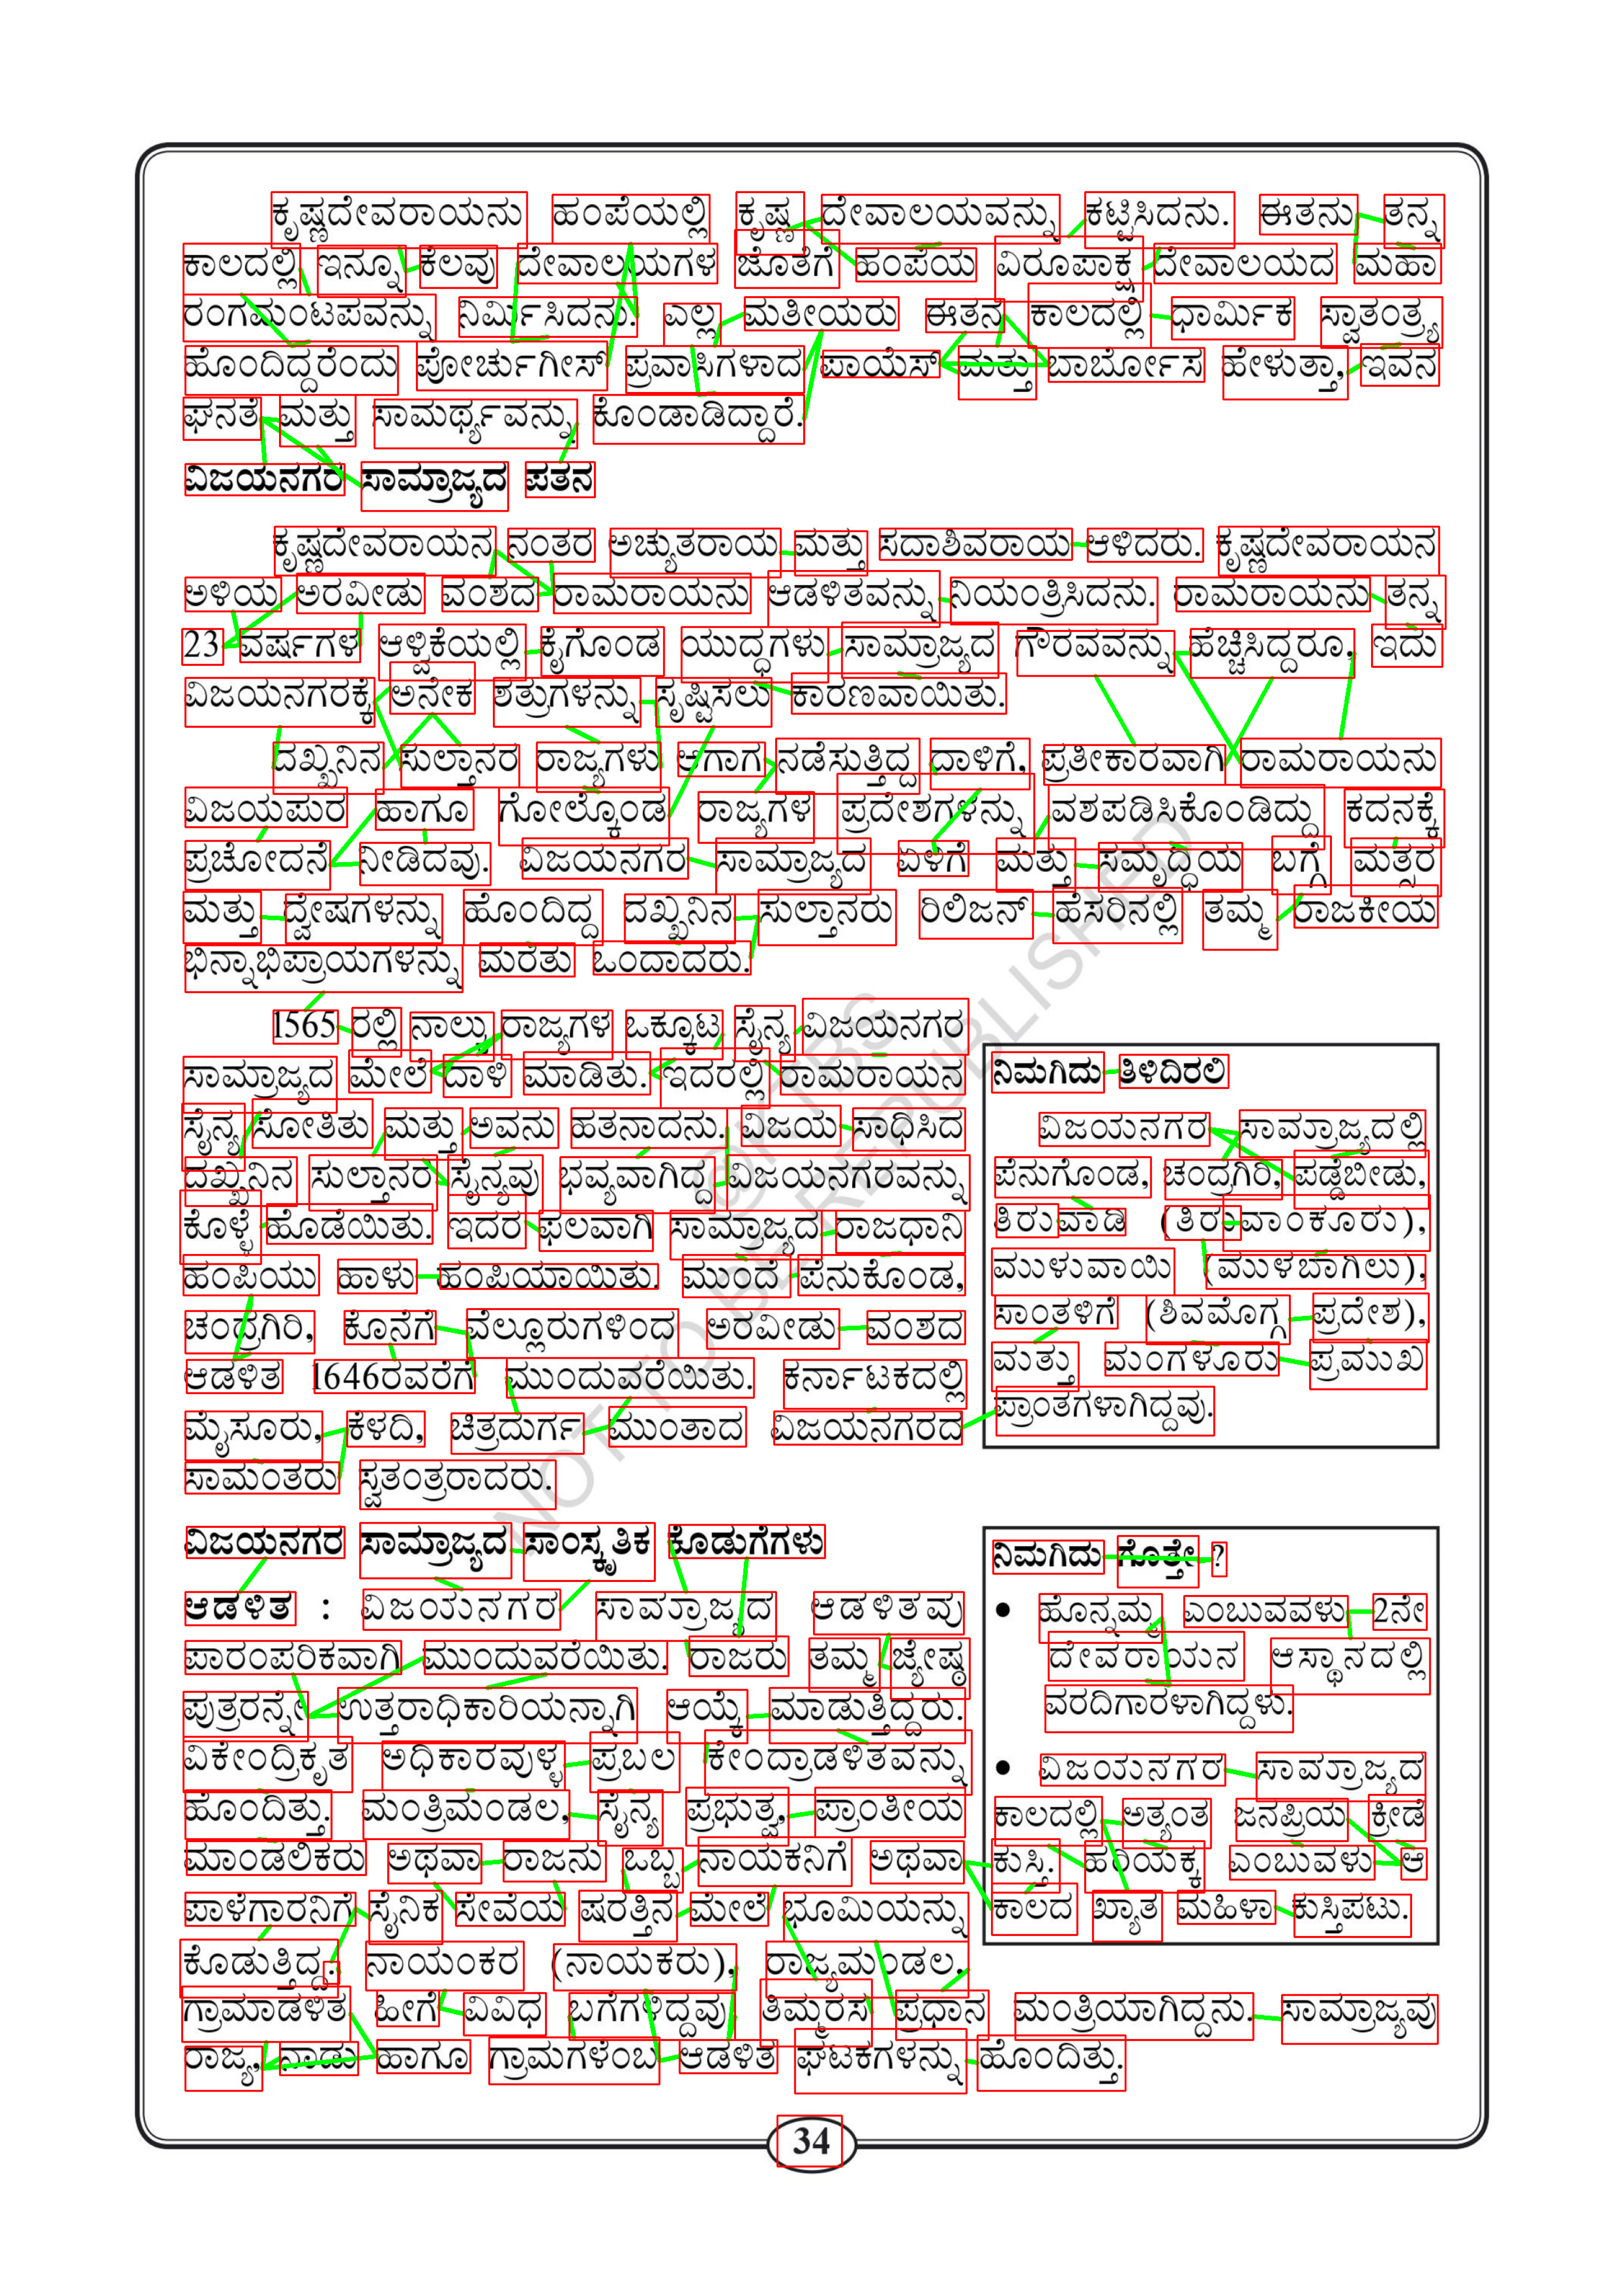

In [435]:
df_box = pd.read_csv("./SMAI - AQ2/CSV/TLBR_145.csv")
img1 = cv2.imread("./SMAI - AQ2/images/145.jpg")

visualize_bboxes(img1,df_box,clust_mappings)